# 3D Views - Planes and Relief Surfaces

3D Views contain 3D models that represent surface and sub-surface objects as 3-dimensional shapes and features.  3D views are stored in a file with extension .geosoft_3dv and can be viewed in Geosoft's 3D viewer.

A 3D view also has one or more "drawing planes" on which 2D objects will be drawn.  A 3D view will always have at least one drawing plane that by default is a horizontal surface at elevation=0. Additional drawing planes can be added for various purposes, such as creating stacked 3D planes. Drawing planes can also be turned into a functional surface, the shape of which is determined from a data grid.  For example, defining the shape of a drawing plane from a DEM surface results in it becoming a true 3D DEM surface.

## What You Will Learn

1. How to create a 3D View and display a 3D View in the Geosoft Viewer.
2. How to draw 2D features to the default drawing plane.
3. How to add a relief surface to a drawing plane.
4. How to draw on a relief surface.
5. How to create stacked surfaces.

__See also:__ [Tutorial page](https://geosoftgxdev.atlassian.net/wiki/spaces/GXD93/pages/111542335/3D+Views+-+Planes+and+Relief+Surfaces)

## Imports and GX Context

In [1]:
import geosoft.gxpy.gx as gx
import geosoft.gxpy.view as gxview
import geosoft.gxpy.group as gxgroup
import geosoft.gxpy.agg as gxagg
import geosoft.gxpy.grid as gxgrd
import geosoft.gxpy.viewer as gxviewer
import geosoft.gxpy.utility as gxu
import geosoft.gxpy.map as gxmap
from IPython.display import Image

gxc = gx.GXpy()

## Get Data from GitHub

In [2]:
url = 'https://github.com/GeosoftInc/gxpy/raw/9.3/examples/tutorial/3D%20Views/'
gxu.url_retrieve(url + 'Wittichica Creek Residual Total Field.grd')
gxu.url_retrieve(url + 'Wittichica Creek Residual Total Field.grd.gi')
gxu.url_retrieve(url + 'Wittichica Creek Residual Total Field.grd.xml')
gxu.url_retrieve(url + 'Wittichica DEM.grd')
gxu.url_retrieve(url + 'Wittichica DEM.grd.gi')
gxu.url_retrieve(url + 'Wittichica DEM.grd.xml')

tmi_file = 'Wittichica Creek Residual Total Field.grd'
dem_file = 'Wittichica DEM.grd'

## Draw to a Flat Plane in 3D

In this first example we will simply draw to the default drawing plane on a new 3D view.

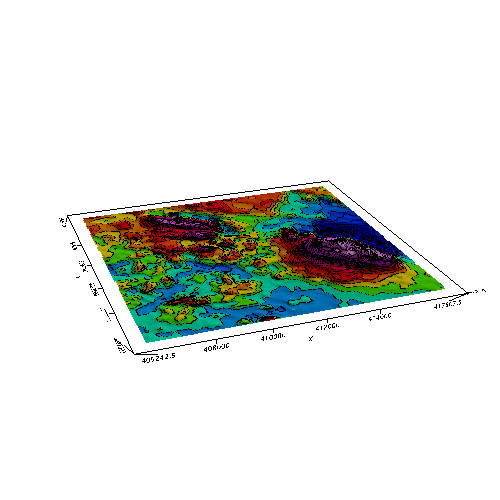

In [3]:
# create a 3D view
with gxview.View_3d.new("TMI on a plane",
                        area_2d=gxgrd.Grid(tmi_file).extent_2d(),
                        coordinate_system=gxgrd.Grid(tmi_file).coordinate_system,
                        overwrite=True) as v:
 
    v3d_name = v.file_name
 
    # add the grid image to the view, with shading, ands contour
    gxgroup.Aggregate_group.new(v, gxagg.Aggregate_image.new(tmi_file, shade=True, contour=20))
    gxgroup.contour(v, 'TMI_contour', tmi_file)

# create a PNG and display
png_file = '3d_plane.png'
gxmap.save_as_image(v3d_name, png_file, pix_width=500)
Image(png_file)

## Draw on a 3D Relief Surface

In this example we use the data values to define a 3D relief surface for the drawing plane, which transforms from a flat plane to a function surface with function relief defined by the grid data values.

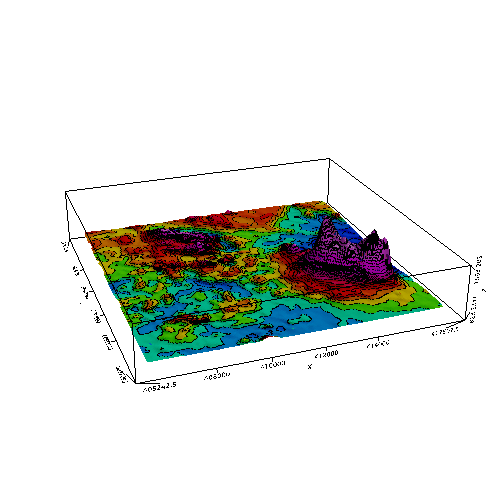

In [4]:
# create a 3D view
with gxview.View_3d.new("TMI in relief",
                        area_2d=gxgrd.Grid.open(tmi_file).extent_2d(),
                        coordinate_system=gxgrd.Grid.open(tmi_file).coordinate_system,
                        overwrite=True) as v:
 
    v3d_name = v.file_name
 
    # use the data grid as the relief surface
    v.set_plane_relief_surface(tmi_file)
 
    # add the grid image to the view, with shading, 20 nT contour interval to match default contour lines
    gxgroup.Aggregate_group.new(v, gxagg.Aggregate_image.new(tmi_file, shade=True, contour=20))
    gxgroup.contour(v, 'TMI_contour', tmi_file)
    
# create a PNG and display
png_file = '3d_TMI_relief.png'
gxmap.save_as_image(v3d_name, png_file, pix_width=500)
Image(png_file)

## Display Data on the Digital Elevation Model

Instead of using the TMI grid to define the relief surface, this time we will use the DEM grid.

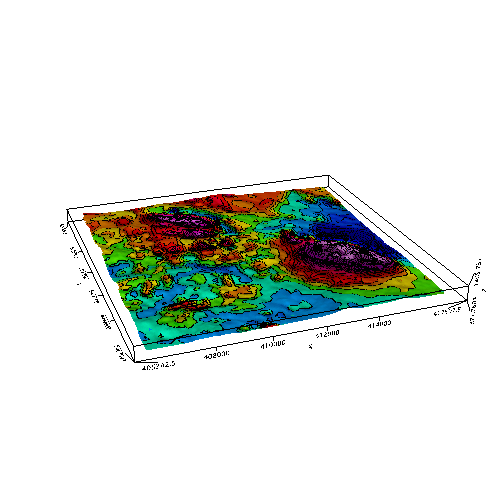

In [5]:
# create a 3D view
with gxview.View_3d.new("TMI in relief",
                        area_2d=gxgrd.Grid.open(tmi_file).extent_2d(),
                        coordinate_system=gxgrd.Grid.open(tmi_file).coordinate_system,
                        overwrite=True) as v:
 
    v3d_name = v.file_name
 
    # use the data grid as the relief surface
    v.set_plane_relief_surface(dem_file)
 
    # add the grid image to the view, with shading, 20 nT contour interval to match default contour lines
    gxgroup.Aggregate_group.new(v, gxagg.Aggregate_image.new(tmi_file, shade=True, contour=20))
    gxgroup.contour(v, 'TMI_contour', tmi_file)
    
# create a PNG and display
png_file = '3d_TMI_on_dem.png'
gxmap.save_as_image(v3d_name, png_file, pix_width=500)
Image(png_file)

## Stacked Planes

A common presentation shows different data layers appearing to float relative to each other.  Here we create two floating planes shown relative to the DEM, which is shown as a relief surface at the expected Z elevation.  The TMI data is shown as a relief surface floating above the DEM with relief determined by the TMI values, and a contour of the DEM data on a flat plane beneath the DEM surface.

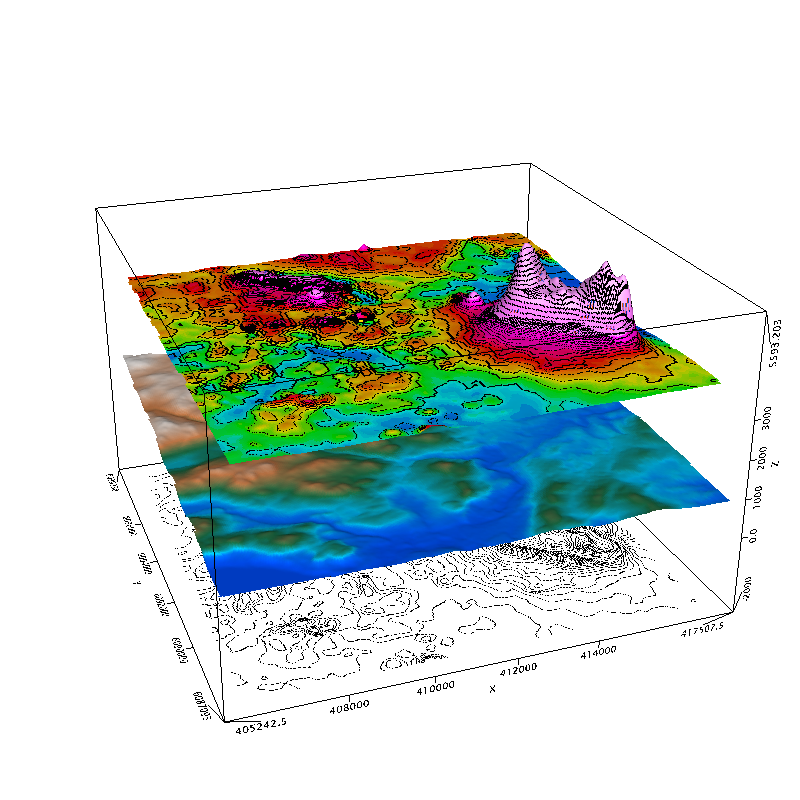

In [6]:
# create a 3D view
with gxview.View_3d.new("Stacked planes",
                        area_2d=gxgrd.Grid.open(tmi_file).extent_2d(),
                        coordinate_system=gxgrd.Grid.open(tmi_file).coordinate_system,
                        overwrite=True) as v:
 
    v3d_name = v.file_name
 
    # use the data grid as the relief surface
    v.set_plane_relief_surface(dem_file)
    gxgroup.Aggregate_group.new(v, gxagg.Aggregate_image.new(dem_file,
                                                             color_map='elevation.tbl'))

    # relief plane for the TMI, offset to elevation 2000
    v.new_drawing_plane('TMI relief')
    v.set_plane_relief_surface(tmi_file, base=-4000)
    gxgroup.Aggregate_group.new(v, gxagg.Aggregate_image.new(tmi_file))
    gxgroup.contour(v, 'TMI_contour', tmi_file)
 
    # add DEM contours on a plane floating beneath the DEM
    v.new_drawing_plane('Scratch plane', offset=(0, 0, -2000))
    gxgroup.contour(v, 'DEM contour', tmi_file)
    
# create a PNG and display
png_file = 'Stacked planes.png'
gxmap.save_as_image(v3d_name, png_file, pix_width=800)
Image(png_file)

## Display in the Geosoft 3D Viewer

Finally we will open the stacked view in the Geosoft 3D Viewer.  

In [7]:
gxviewer.view_document(v3d_name, wait_for_close=False)